In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
#    1.1 Load the Data

# First, use pd.read csv() function to load the dataset from the given file named global air quality.csv into a Pandas DataFrame. 
# Print the DataFrame you have just created.

df= pd.read_csv("global_air_quality.csv")
df

,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,...,FactValueUoM,FactValueNumericLowPrefix,FactValueNumericLow,FactValueNumericHighPrefix,FactValueNumericHigh,Value,FactValueTranslationID,FactComments,Language,DateModified
0,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AFR,Africa,Country,KEN,Kenya,Year,2019,...,NaN,NaN,6.29,NaN,13.74,10.01 [6.29-13.74],NaN,NaN,EN,2022-08-12 00:00:00
1,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AMR,Americas,Country,TTO,Trinidad and Tobago,Year,2019,...,NaN,NaN,7.44,NaN,12.55,10.02 [7.44-12.55],NaN,NaN,EN,2022-08-12 00:00:00
2,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,EUR,Europe,Country,GBR,United Kingdom of Great Britain and Northern I...,Year,2019,...,NaN,NaN,9.73,NaN,10.39,10.06 [9.73-10.39],NaN,NaN,EN,2022-08-12 00:00:00
3,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AMR,Americas,Country,GRD,Grenada,Year,2019,...,NaN,NaN,7.07,NaN,13.20,10.08 [7.07-13.20],NaN,NaN,EN,2022-08-12 00:00:00
4,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AMR,Americas,Country,BRA,Brazil,Year,2019,...,NaN,NaN,8.23,NaN,12.46,10.09 [8.23-12.46],NaN,NaN,EN,2022-08-12 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9445,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AMR,Americas,Country,BLZ,Belize,Year,2010,...,NaN,NaN,3.91,NaN,20.28,9.92 [3.91-20.28],NaN,NaN,EN,2022-08-12 00:00:00
9446,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AMR,Americas,Country,TTO,Trinidad and Tobago,Year,2010,...,NaN,NaN,7.80,NaN,12.89,9.92 [7.80-12.89],NaN,NaN,EN,2022-08-12 00:00:00
9447,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AFR,Africa,Country,KEN,Kenya,Year,2010,...,NaN,NaN,6.30,NaN,13.57,9.94 [6.30-13.57],NaN,NaN,EN,2022-08-12 00:00:00
9448,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AMR,Americas,Country,USA,United States of America,Year,2010,...,NaN,NaN,9.78,NaN,10.11,9.95 [9.78-10.11],NaN,NaN,EN,2022-08-12 00:00:00


In [6]:
df["FactValueNumeric"]
var1= df["FactValueNumeric"]
var1

0       10.01
1       10.02
2       10.06
3       10.08
4       10.09
        ...  
9445     9.92
9446     9.92
9447     9.94
9448     9.95
9449    92.79
Name: FactValueNumeric, Length: 9450, dtype: float64

In [7]:
#    1.2   Make a New Column

# The FactValueNumeric column contains the air quality information we want.
# With the values from the FactValueNumeric column, add a new column to your DataFrame called PM25 Value. 
# Print the DataFrame containing only the FactValueNumeric and PM25 Value columns. They should have identical numbers.

df['PM25_Value'] = df['FactValueNumeric'] 
print(df[['FactValueNumeric', 'PM25_Value']])

      FactValueNumeric  PM25_Value
0                10.01       10.01
1                10.02       10.02
2                10.06       10.06
3                10.08       10.08
4                10.09       10.09
...                ...         ...
9445              9.92        9.92
9446              9.92        9.92
9447              9.94        9.94
9448              9.95        9.95
9449             92.79       92.79

[9450 rows x 2 columns]


In [8]:
#    1.3   Calculate Average PM2.5 Concentration

# The ParentLocation column contains the continent location for each country. 
# Calculate the average PM2.5 concentration for each continent and create a new DataFrame with these averages. Group the countries by their ParentLocation. 
# Rename the column from PM25 Value to Average PM25. 
# Merge the average values back into the original DataFrame. 
# Print the DataFrame with to show columns Locations, Parent Location,PM25 Value and Average PM25...


# Calculate average PM_25 for each continent
Continent_Average_PM25= df.groupby('ParentLocation')['PM25_Value'].mean()

# Create a new DataFrame with averages
Average_PM25 = pd.DataFrame({'Average_PM25': Continent_Average_PM25.values}, index= Continent_Average_PM25.index)
Average_PM25.index.name= 'ParentLocation'  

# Merge average values back into the original DataFrame
df = df.merge(Average_PM25, on='ParentLocation', how='left')

# Print the DataFrame to show columns Location, ParentLocation , PM25_Value, and Average_PM25
print(df[['Location', 'ParentLocation', 'PM25_Value', 'Average_PM25']])

                                               Location  \
0                                                 Kenya   
1                                   Trinidad and Tobago   
2     United Kingdom of Great Britain and Northern I...   
3                                               Grenada   
4                                                Brazil   
...                                                 ...   
9445                                             Belize   
9446                                Trinidad and Tobago   
9447                                              Kenya   
9448                           United States of America   
9449                                        Afghanistan   

             ParentLocation  PM25_Value  Average_PM25  
0                    Africa       10.01     29.812282  
1                  Americas       10.02     14.645728  
2                    Europe       10.06     19.244727  
3                  Americas       10.08     14.645728  
4          

In [9]:
#    1.4   Analyze Data

# Determine which continent (ParentLocation) has the highest average air pollution (concentrations of fine particular matter)

highest_PM25 = df.loc[df['Average_PM25'].idxmax(), 'ParentLocation']
print(f"The continent with the highest average air pollution: {highest_PM25}")

# Does this surprise you? Why or why not? Include these answer as a comment(s) in your code
## I find it surprising considering that, from a google search, it seems to be comprised of less countries than other continents. Perhaps it lacks regulations on pollution.

The continent with the highest average air pollution: Eastern Mediterranean


In [10]:
#    1.5 Save the Processed Data

# Lastly, save the updated DataFrame with just the columns Locations, Parent Location, PM25 Value and Average PM25 as a new CSV file to your system.
# Please submit this CSV file alongside your Jupyter Notebook submission for this assignment.

columns = ['Location', 'ParentLocation', 'PM25_Value', 'Average_PM25']
updated_df = df[columns]

# Save the DataFrame to a CSV file
updated_df.to_csv('updated_air_pollution_dataframe.csv', index=False)

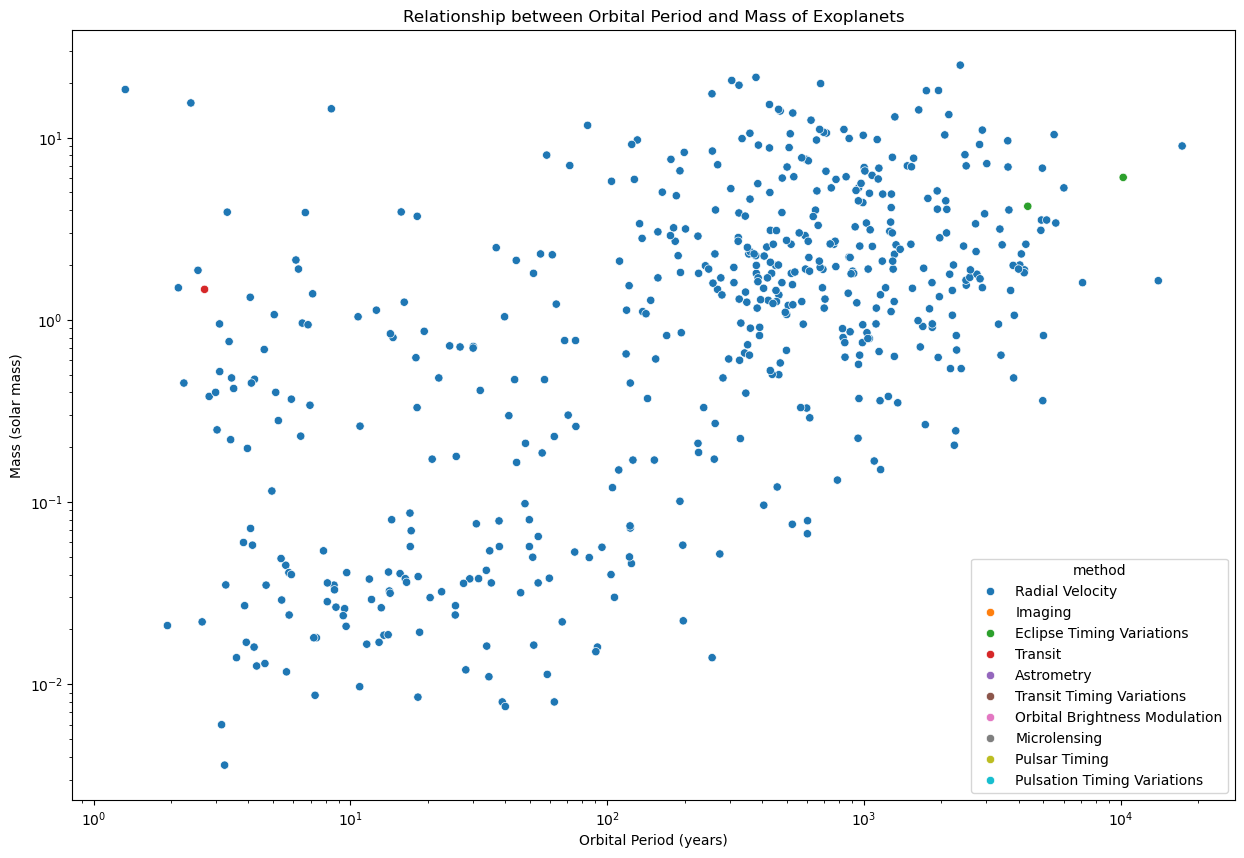

In [17]:
#    2.1 Create a Scatter plot

# First, load the dataset using sns.load dataset(‘planets’) and store it in a Pandas DataFrame. 
# Your task is to create a scatter plot that visualizes the relationship between orbital period (x-axis) and mass (y-axis) of all the exoplanets in the planets dataset. 
# Color the data points according to the exoplanet’s discovery method. Try using seaborn instead of matplotlib to generate this plot.

import seaborn as sns
sns.load_dataset('planets')

planets_df = sns.load_dataset('planets')

# Scatter plot using Seaborn
plt.figure(figsize=(15, 10))

sns.scatterplot(x='orbital_period', y='mass', hue='method', data= planets_df)
plt.title("Relationship between Orbital Period and Mass of Exoplanets")
plt.xlabel("Orbital Period (years)")
plt.ylabel("Mass (solar mass)")
plt.xscale('log')
plt.yscale('log')
plt.show()

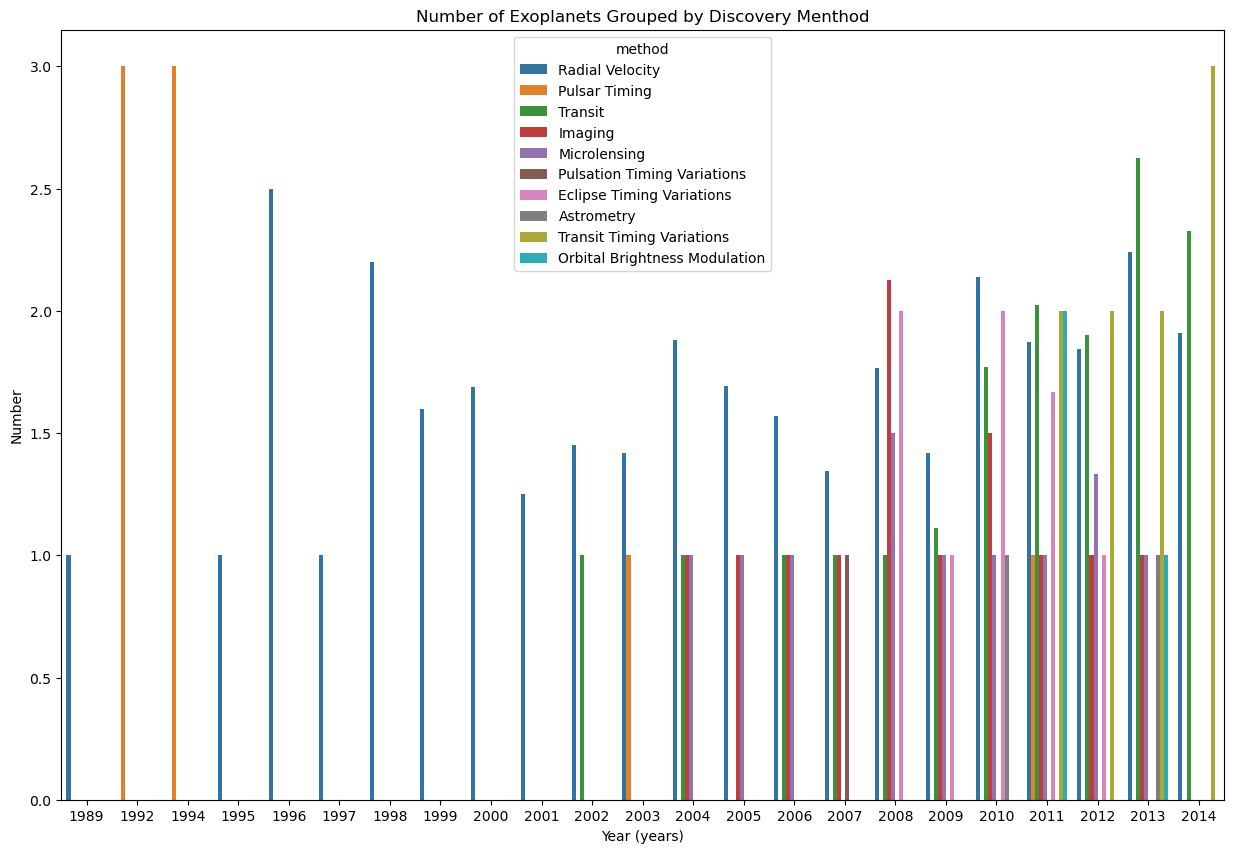

In [19]:
#    2.2 Create a Bar Chart

# Next, create a bar chart where each stacked bar represents the total number of exoplanets discovered (y-axis) in each year (x-axis), 
# grouped by the discovery method. 

# For example, a bar for 2024 would have sections for radial velocity,
# mircolensing, imaging, etc. Each discovery method should have its own color.
# We highly recommend using seaborn over matplotlib for this bar chart.
# Before you submit this plot, make sure it has:
# • A descriptive title
# • Axis labels (with units!)
# • A legend explaining the exoplanet color coding
# Hints: It is a good idea to remove missing values (NaNs) in the dataset before plotting. 
# To create a stacked bar plot, you can use Seaborn’s plotting functions along with the hue parameter to differentiate between discovery methods.

planets_df_2 = planets_df.dropna(subset=['year', 'number', 'method'])

plt.figure(figsize=(15, 10))

sns.barplot(x='year', y='number', hue='method', data= planets_df_2, errorbar=None)
plt.title("Number of Exoplanets Grouped by Discovery Menthod")
plt.xlabel("Year (years)")
plt.ylabel("Number")
plt.show()

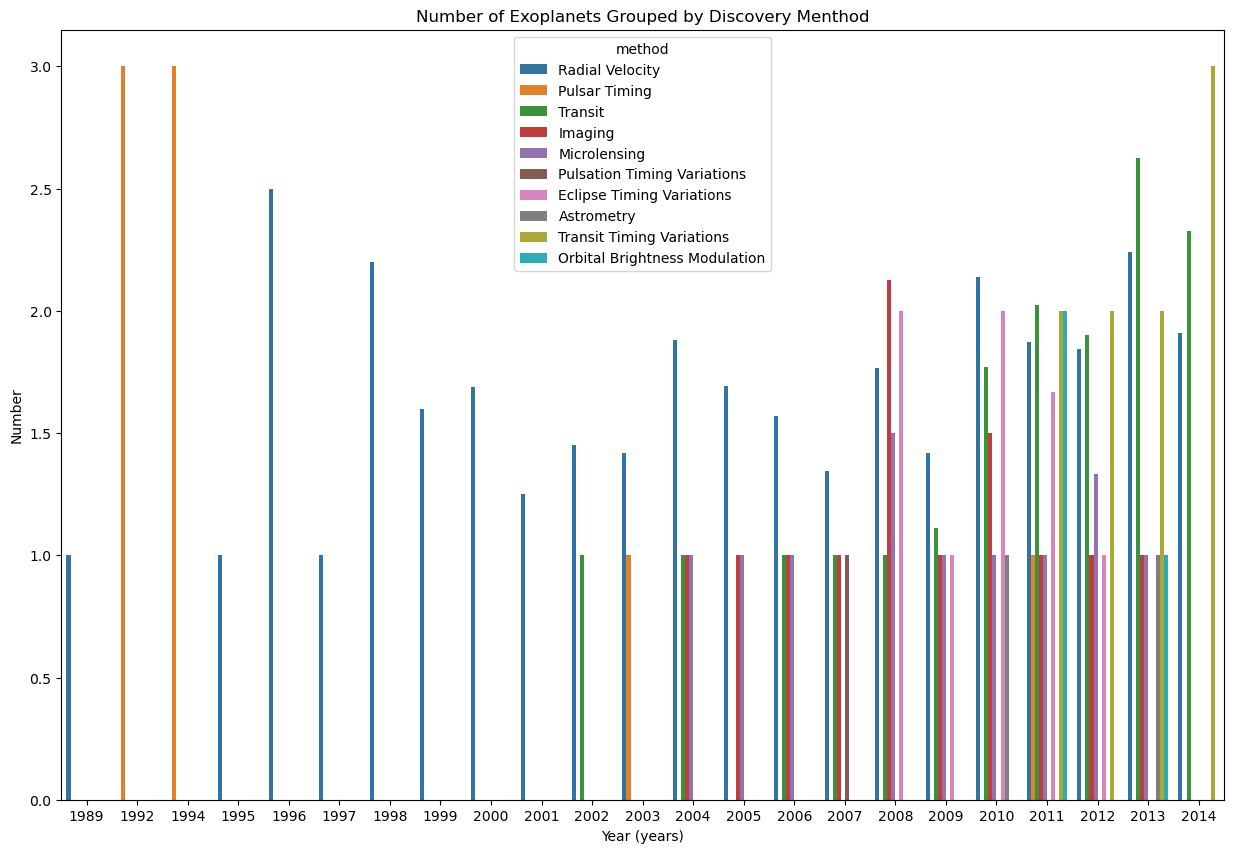

In [23]:

plt.figure(figsize=(15, 10))

sns.barplot(x='year', y='number', hue='method', data= planets_df, errorbar=None)
plt.title("Number of Exoplanets Grouped by Discovery Menthod")
plt.xlabel("Year (years)")
plt.ylabel("Number")
plt.show()

<Axes: xlabel='year', ylabel='number'>

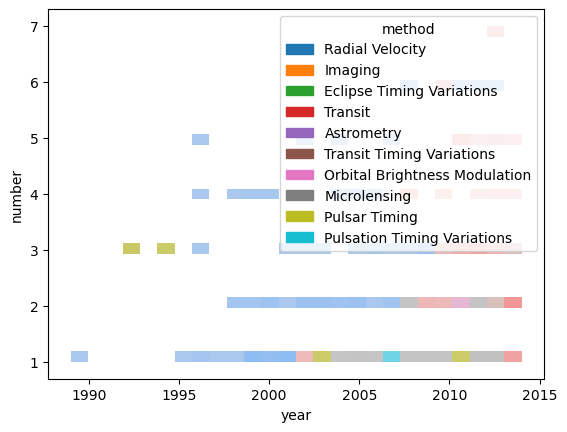

In [14]:
sns.histplot(x='year', y='number', hue='method', data= planets_df)